In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import datasets, layers, models
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
#from keras.applications.vgg19 import VGG19
#from keras.applications.inception_resnet_v2 import InceptionResNetV2
#from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
Image_size = [224,224]
train_path = '/content/drive/MyDrive/Datasets/handgesture/train/'
test_path = '/content/drive/MyDrive/Datasets/handgesture/test/'

In [ ]:
vgg = VGG16(input_tensor=Input(shape=(224, 224, 3)), weights = 'imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/Datasets/handgesture/train/*')
folders

['/content/drive/MyDrive/Datasets/handgesture/train/3',
 '/content/drive/MyDrive/Datasets/handgesture/train/2',
 '/content/drive/MyDrive/Datasets/handgesture/train/1',
 '/content/drive/MyDrive/Datasets/handgesture/train/0',
 '/content/drive/MyDrive/Datasets/handgesture/train/5',
 '/content/drive/MyDrive/Datasets/handgesture/train/4']

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224),
                                                 batch_size=32, class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path, target_size=(224,224),
                                                 batch_size=32, class_mode='categorical')

Found 715 images belonging to 6 classes.
Found 371 images belonging to 6 classes.


In [ ]:
final_model = model.fit(training_set,validation_data = test_set, epochs=10,steps_per_epoch = len(training_set),
                                 validation_steps=len(test_set))

Epoch 1/10
23/23 [==============================] - 338s 14s/step - loss: 1.0374 - accuracy: 0.6881 - val_loss: 0.6600 - val_accuracy: 0.7089
Epoch 2/10
23/23 [==============================] - 11s 496ms/step - loss: 0.1299 - accuracy: 0.9930 - val_loss: 0.3737 - val_accuracy: 0.8706
Epoch 3/10
23/23 [==============================] - 12s 512ms/step - loss: 0.0530 - accuracy: 1.0000 - val_loss: 0.2546 - val_accuracy: 0.8976
Epoch 4/10
23/23 [==============================] - 12s 508ms/step - loss: 0.0343 - accuracy: 0.9986 - val_loss: 0.2356 - val_accuracy: 0.9030
Epoch 5/10
23/23 [==============================] - 12s 516ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.2398 - val_accuracy: 0.9218
Epoch 6/10
23/23 [==============================] - 12s 515ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.1919 - val_accuracy: 0.9434
Epoch 7/10
23/23 [==============================] - 12s 519ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.2266 - val_accuracy: 0.9326


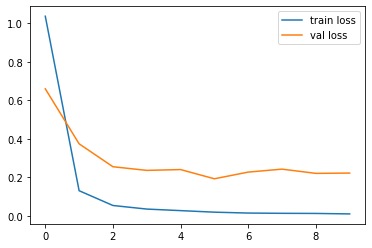

In [ ]:
plt.plot(final_model.history['loss'], label ='train loss')
plt.plot(final_model.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save("/content/drive/MyDrive/opencv/Dataset/hand_gesture_model.h5")